<a href="https://colab.research.google.com/github/Amirrezahmi/SelfTalker/blob/main/main%20project/SelfTalker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# $\color{red}{\text{Self Talker AI}}$

## $\color{cyan}{\text{Project Overview}}$

Imagine being able to converse with a version of yourself that can provide answers to any question you may have. This project aimed to achieve just that!

You can now engage in a conversation with yourself and seek answers to questions that may have previously eluded you.

Using cutting-edge machine learning techniques such as NLP, voice cloning, computer vision, etc., we have created a virtual version of you that can seamlessy communicate with you. This AI-powered version of yourself is capable of understanding the nuances of human language and can provide insightful and accurate responses to your queries.

Upon receiving the input prompt, the program initiates the answer generation process. Subsequently, it proceeds to extract relevant keywords and phrases from the generated response. Also the program summarize the generated answer to improve the quality of the final text. To enhance the understanding of the content, the program creates two images: the first image is generated using the extracted keywords, while the second image utilizes the extracted phrases from the generated text. Additionally, leveraging the aforementioned keywords and phrases, the program generates two videos. Next, employing voice cloning techniques and utilizing a dataset of your recorded voice, the program synthesizes the text into speech, employing your unique vocal characteristics. Furthermore, by utilizing your $256 \times 256$ input image in `.jpg` format, the program automatically generates a talking-head video, employing your input image as a base, and synchronized with the cloned voice.

So, whether you're seeking advice on a personal matter, looking for guidance in your career, or simply curious about the world around you, this AI-powered version of yourself is always at your disposal.

With this project, the possibilities are endless. You can have conversations with your virtual self.




# $\color{pink}{\text{Install and import requirements}}$

Note that the order of installing the prerequisites is not orderly and you may need to restart the runtime after running the cells in this section.

By the way, for section 1 (Text generation) you need to download my fine-tuned GPT-2 model which I'll talk about it more in step 1.
<a href="https://drive.google.com/drive/folders/11W-KNm_lFtqAu0Kw7ANw-PcefkpD0aCP"> Click here</a>
to have access to the drive. Or if you want to fine-tune GPT-2 with your own dataset, I'll provide my code for this step in another jupyter notebook.



$\color{yellow}{\text{This cell is to mount the drive and also to install the transformers:}}$

In [ ]:
!pip install transformers
from google.colab import drive
drive.mount('/content/drive')

from transformers import GPT2LMHeadModel, GPT2Tokenizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 90.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 122.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 88.1 MB/s eta 0:00:00
Mounted at /content/drive


$\color{yellow}{\text{For the "voice cloning" step, you need to run the following cell:}}$

In [ ]:
!pip3 install -U scipy

!git clone https://github.com/jnordberg/tortoise-tts.git
%cd tortoise-tts
!pip3 install -r requirements.txt
!pip3 install transformers==4.19.0 einops==0.5.0 rotary_embedding_torch==0.1.5 unidecode==1.3.5
!python3 setup.py install
!pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Cloning into 'tortoise-tts'...
remote: Enumerating objects: 1481, done.
remote: Counting objects: 100% (442/442), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 1481 (delta 397), reused 392 (delta 392), pack-reused 1039
Receiving objects: 100% (1481/1481), 53.55 MiB | 23.33 MiB/s, done.
Resolving deltas: 100% (615/615), done.
/content/tortoise-tts
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 44.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 11.4 MB/

running install
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer, pypa/build or
        other standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: EasyInstallDeprecationWarning: easy_install command is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` and ``easy_install``.
        Instead, use pypa/build, pypa/installer, pypa/build or
        other standards-based t

$\color{yellow}{\text{For "MakeItTalk: Speaker-Aware Talking-Head Animation" step, you need to run the following cell:}}$

In [ ]:
print('Git clone project and install requirements...')
!git clone https://github.com/yzhou359/MakeItTalk &> /dev/null
%cd MakeItTalk/
!export PYTHONPATH=/content/MakeItTalk:$PYTHONPATH
!pip install -r requirements.txt &> /dev/null
!pip install tensorboardX &> /dev/null
!pip install -U numpy
!mkdir examples/dump
!mkdir examples/ckpt
!pip install gdown &> /dev/null
print('Done!')
print('Download pre-trained models...')
!gdown -O examples/ckpt/ckpt_autovc.pth https://drive.google.com/uc?id=1ZiwPp_h62LtjU0DwpelLUoodKPR85K7x
!gdown -O examples/ckpt/ckpt_content_branch.pth https://drive.google.com/uc?id=1r3bfEvTVl6pCNw5xwUhEglwDHjWtAqQp
!gdown -O examples/ckpt/ckpt_speaker_branch.pth https://drive.google.com/uc?id=1rV0jkyDqPW-aDJcj7xSO6Zt1zSXqn1mu
!gdown -O examples/ckpt/ckpt_116_i2i_comb.pth https://drive.google.com/uc?id=1i2LJXKp-yWKIEEgJ7C6cE3_2NirfY_0a
!gdown -O examples/dump/emb.pickle https://drive.google.com/uc?id=18-0CYl5E6ungS3H4rRSHjfYvvm-WwjTI
print('Done!')

Git clone project and install requirements...
/content/MakeItTalk
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.24.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.3 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.3 which is incompatible.


mkdir: cannot create directory ‘examples/dump’: File exists
mkdir: cannot create directory ‘examples/ckpt’: File exists
Done!
Download pre-trained models...
Downloading...
From: https://drive.google.com/uc?id=1ZiwPp_h62LtjU0DwpelLUoodKPR85K7x
To: /content/MakeItTalk/examples/ckpt/ckpt_autovc.pth
100% 172M/172M [00:03<00:00, 55.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1r3bfEvTVl6pCNw5xwUhEglwDHjWtAqQp
To: /content/MakeItTalk/examples/ckpt/ckpt_content_branch.pth
100% 7.88M/7.88M [00:00<00:00, 11.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1rV0jkyDqPW-aDJcj7xSO6Zt1zSXqn1mu
To: /content/MakeItTalk/examples/ckpt/ckpt_speaker_branch.pth
100% 15.4M/15.4M [00:00<00:00, 162MB/s]
Downloading...
From: https://drive.google.com/uc?id=1i2LJXKp-yWKIEEgJ7C6cE3_2NirfY_0a
To: /content/MakeItTalk/examples/ckpt/ckpt_116_i2i_comb.pth
100% 839M/839M [00:10<00:00, 81.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=18-0CYl5E6ungS3H4rRSHjfYvvm-WwjTI
To: /content/Mak

In [ ]:
#We need to do this because of the latest numpy we'll face "SystemError: initialization of _internal failed without raising an exception" So we need to install numpy==1.23.5
!pip uninstall numpy

Found existing installation: numpy 1.23.5
Uninstalling numpy-1.23.5:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/bin/f2py3
    /usr/local/bin/f2py3.10
    /usr/local/lib/python3.10/dist-packages/numpy-1.23.5.dist-info/*
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libopenblas64_p-r0-742d56dc.3.20.so
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libquadmath-96973f99.so.0.0.0
    /usr/local/lib/python3.10/dist-packages/numpy/*
Proceed (Y/n)? y
  Successfully uninstalled numpy-1.23.5


In [ ]:
!pip install numpy==1.23.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.23.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3


In [ ]:
!pip install librosa==0.8.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.8/203.8 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 30.1 MB/s eta 0:00:00
  Attempting uninstall: librosa
    Found existing installation: librosa 0.10.0.post2
    Uninstalling librosa-0.10.0.post2:
      Successfully uninstalled librosa-0.10.0.post2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
resemblyzer 0.1.3 requires librosa>=0.9.1, but you have librosa 0.8.1 which is incompatible.


$\color{yellow}{\text{For "Text-to-Image" step, you need to run the following cell:}}$

In [ ]:
! pip install min-dalle -q

$\color{yellow}{\text{The following cells are related to Text-to-Video step:}}$

In [ ]:
#@title Check your GPU!
!nvidia-smi

Tue Jun 13 13:53:56 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#@title Install dependencies
!pip install torch==2.0.0 git+https://github.com/huggingface/diffusers transformers accelerate imageio[ffmpeg]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/huggingface/diffusers to /tmp/pip-req-build-5fi8u62f
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers /tmp/pip-req-build-5fi8u62f
  Resolved https://github.com/huggingface/diffusers to commit ce5504934ac484fca39a1a5434ecfae09eabdf41
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 98.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.6/227.6 kB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 72.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 61.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8

$\color{yellow}{\text{For the "Keyword Extraction" step, you need to run the following cell:}}$

In [ ]:
!pip install keybert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 54.9 MB/s eta 0:00:00
  Created wheel for keybert: filename=keybert-0.7.0-py3-none-any.whl size=23777 sha256=1eec02f2f1b513f93987280709af1d4570ca511cab6e49268c3fc84721f565cd
  Stored in directory: /root/.cache/pip/wheels/66/8d/e6/b0e2f8d883b0fd51819226f67ad9843e04913ce4a97241ff4b
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125926 sha256=3f6e85d05d65d39cc00703abf788d290126ccced0a69ff97824451ea2d6ec7b5
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built keybert sentence-transformers


In [ ]:
import torch
import torchaudio
import torch.nn as nn
import torch.nn.functional as F

import IPython

from tortoise.api import TextToSpeech
from tortoise.utils.audio import load_audio, load_voice, load_voices
tts = TextToSpeech()

import os

Downloading:   0%|          | 0.00/2.06k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.18G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/159 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.57k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/181 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

100% (1716988501 of 1716988501) |########| Elapsed Time: 0:01:22 Time:  0:01:22


Done.


100% (60938957 of 60938957) |############| Elapsed Time: 0:00:03 Time:  0:00:03


Done.


100% (975620731 of 975620731) |##########| Elapsed Time: 0:00:44 Time:  0:00:44


Done.


100% (151223901 of 151223901) |##########| Elapsed Time: 0:00:01 Time:  0:00:01


Done.


100% (1169472627 of 1169472627) |########| Elapsed Time: 0:00:51 Time:  0:00:51


Done.


100% (391384715 of 391384715) |##########| Elapsed Time: 0:00:18 Time:  0:00:18


Done.


100% (25193729 of 25193729) |############| Elapsed Time: 0:00:02 Time:  0:00:02


Done.


100% (100715777 of 100715777) |##########| Elapsed Time: 0:00:05 Time:  0:00:05


Done.


In [ ]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer, pipeline

In [ ]:
from pydub import AudioSegment
from scipy.io import wavfile

# $\color{red}{\text{Step 1:}}$ $\color{green}{\texttt{Text Generation}}$

The first step involves generating text using our fine-tuned GPT-2 model, which has been trained and saved for this purpose.

Make sure you have downloaded my fine-tuned GPT-2 model from <a href="https://drive.google.com/drive/folders/11W-KNm_lFtqAu0Kw7ANw-PcefkpD0aCP"> here</a>. Otherwise you have to use OpenAI API to use GPT-3.5 or GPT-4 or even your own model (I will share my code for fine-tuning GPT-2 with your own dataset in another jupyter note book!), Using API hasn't been covered in this notebook because I wanted to use my own fine-tuned model which has trained on a specefic dataset, and also note that using OpenAI API has limited of usage and also you aren't free to enter any input prompt you want to! for example using OpenAI API asking `How can I make a bomb`, it won't answer to your question because it classifies user input based on prompts (`prompt classification`).

In [ ]:
# Load the saved model from Drive
saved_model = GPT2LMHeadModel.from_pretrained("/content/drive/My Drive/path/to/folder/my_sjaved_model")

# Load the tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('gpt2-medium')

Downloading:   0%|          | 0.00/0.99M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/718 [00:00<?, ?B/s]

## $\color{orange}{\text{Examples:}}$

In [ ]:
# Generate some text using the saved model
prompt = "What should I study, to become an AI developer?"
input_ids = tokenizer.encode(prompt, return_tensors='pt')
output = saved_model.generate(input_ids, max_length=200, num_beams=5,no_repeat_ngram_size=2, do_sample=True)
generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
print(generated_text)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


What should I study, to become an AI developer? AI development is a broad field, encompassing everything from machine learning and natural language processing to artificial intelligence and robotics. There are many different types of AI, such as computer vision, deep learning, artificial neural networks, and deep reinforcement learning. AI can be applied to a wide range of fields, including medicine, finance, health care, security, law enforcement, education, transportation, agriculture, natural resource management, urban planning, business analytics, information technology, media and entertainment. Artificial intelligence is often used to solve complex problems, but it can also be used for self-driving cars, autonomous drones, medical diagnostics, or other applications. In addition, AI is being used in a variety of industries, from financial services to healthcare and education. Some of the most well-known AI projects include Google's DeepMind, Apple's Siri, IBM's Watson, Microsoft's 

In [ ]:
# Generate some text using the saved model
prompt = "How can I be the greatest computer scientist?"
input_ids = tokenizer.encode(prompt, return_tensors='pt')
output = saved_model.generate(input_ids, max_length=200, num_beams=5,no_repeat_ngram_size=2, do_sample=True)
generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
print(generated_text)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


How can I be the greatest computer scientist? [ edit ]

There is no single answer to this question. The best way to answer it is to look at the career path of the person you want to become. There are many ways to achieve success in the field of computer science. If you are interested in pursuing a career as a software engineer or developer, then you should consider the following: 1) Do you have a strong technical background? 2) Are you willing to learn new things? 3) What are your goals for the future? 4) How do you plan to contribute to the community? 5) Is there anything else you would like to do? 6) Does anyone know of a job that would be a good fit for you? 7) Will you be able to work remotely? 8) Have you considered starting your own company? 9) If so, what kind of company would you like it to be? 10) Would you consider starting a new career? 11) Can


In [ ]:
# Generate some text using the saved model
prompt = "How to become a rich guy?"
input_ids = tokenizer.encode(prompt, return_tensors='pt')
output = saved_model.generate(input_ids, max_length=200, num_beams=5,no_repeat_ngram_size=2, do_sample=True)
generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
print(generated_text)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


How to become a rich guy? [ edit ]

There are a number of ways to get rich. The most common way is to invest in stocks, bonds, real estate, or other assets. Another way to make a lot of money is by becoming a board member of a large corporation. This can be done by buying stock in the corporation and then selling the stock at a profit to the shareholders. For example, if a corporation owns 100% of the shares of Coca-Cola, it can buy 100 million shares at $1.00 each and sell them for $2.50 each. In the same way, a company can sell its stock for more than it is worth and buy it back for a higher price. A corporation can also buy back its own shares and use the proceeds to pay dividends to its shareholders, thereby increasing the value of its shares. There are many other ways of making money, such as by owning shares in companies that produce goods and services, as well as


In [ ]:
# Generate some text using the saved model
prompt = "Why GitHub is important?"
input_ids = tokenizer.encode(prompt, return_tensors='pt')
output = saved_model.generate(input_ids, max_length=200, num_beams=5,no_repeat_ngram_size=2, do_sample=True)
generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
print(generated_text)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Why GitHub is important? GitHub has become an important part of the software development industry. It is the largest open source project in the world, with over 1.3 million contributors, and is used by more than 150,000 companies worldwide. GitHub also has a significant impact on the development of new software products and services, as it enables developers to collaborate and share ideas with each other and other developers around the globe. The GitHub Community is a global community of software developers, software engineers, product managers and others who use GitHub as a platform for collaboration, sharing and sharing ideas. As a result of its popularity, GitHub was named one of Fortune's "100 Best Companies to Work For" by Fortune magazine in 2011. In 2013, the company was ranked as the second-largest employer in Silicon Valley by U.S. News & World Report. For more information about GitHub, visit http://www.github.com/ or follow us on Twitter @GitHub. To learn more about how GitHu

In [ ]:
# Generate some text using the saved model
prompt = "How to become famous?"
input_ids = tokenizer.encode(prompt, return_tensors='pt')
output = saved_model.generate(input_ids, max_length=200, num_beams=5,no_repeat_ngram_size=2, do_sample=True)
generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
print(generated_text)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


How to become famous?

If you want to be famous, you have to do something. If you don't do anything, people won't know who you are and what you're capable of doing. For example, if you do nothing, no one will know you exist. People will just assume that you aren't really famous. However, there are a few things you can do to increase your chances of becoming famous: 1. Write a book. 2. Go on a road trip. 3. Do something you love. 4. Start a business. 5. Become a celebrity. 6. Make a movie. 7. Get married. 8. Have a child. 9. Win an Oscar. 10. Be nominated for an Academy Award. 11. Succeed in a fashion show. 12. Perform in an opera. 13. Play a musical number. 14. Buy a house. 15. Travel the world. 16. Take a tour of a museum. 17. Participate in


In [ ]:
# Generate some text using the saved model
prompt = "How to be a good guy?"
input_ids = tokenizer.encode(prompt, return_tensors='pt')
output = saved_model.generate(input_ids, max_length=200, num_beams=5,no_repeat_ngram_size=2, do_sample=True)
generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
print(generated_text)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


How to be a good guy?

If you want to become a better person, you need to learn how to behave in a way that makes you feel good. This can be something as simple as being nice to people, or as complex as doing the right thing for yourself and others. For example, if you're trying to improve your relationship with your spouse, it may be helpful to think about how you can make them feel better about their relationship, and how they can help you do so. It may also be beneficial to ask yourself, "What can I do to make my spouse feel more comfortable with me?" If you find that you are able to do this, then you will be more likely to treat them with kindness and respect. When you treat someone with respect, they will feel a sense of pride in themselves and in their relationships with you, which will lead to greater self-esteem and happiness in the long run. Another way to achieve this is by being kind to yourself.


$\color{yellow}{\text{finding the last punctuation index "$\color{red}{\text{.}}$", "$\color{red}{\text{?}}$" or "$\color{red}{\text{!}}$"}}$

In [ ]:
#this function is kinda needed. so it will show a meaningful content. It will find the last punctuation index ".", "?" or "!"
def find_last_punctuation_index(text):
    last_index = -1
    punctuation_marks = (".", "?", "!")

    for mark in punctuation_marks:
        index = text.rfind(mark)
        if index > last_index:
            last_index = index

    return last_index

In [ ]:
last_punctuation_index = find_last_punctuation_index(generated_text)
content = generated_text[:last_punctuation_index + 1]  # Extract content from start to last punctuation
print(content)

How to be a good guy?

If you want to become a better person, you need to learn how to behave in a way that makes you feel good. This can be something as simple as being nice to people, or as complex as doing the right thing for yourself and others. For example, if you're trying to improve your relationship with your spouse, it may be helpful to think about how you can make them feel better about their relationship, and how they can help you do so. It may also be beneficial to ask yourself, "What can I do to make my spouse feel more comfortable with me?" If you find that you are able to do this, then you will be more likely to treat them with kindness and respect. When you treat someone with respect, they will feel a sense of pride in themselves and in their relationships with you, which will lead to greater self-esteem and happiness in the long run. Another way to achieve this is by being kind to yourself.


# $\color{red}{\text{Step 2: $\color{green}{\text{Keyword Extraction With $\color{pink}{\text{KeyBERT}}$}}$}}$

In [ ]:
from keybert import KeyBERT

In [ ]:
kw_model = KeyBERT()

kw_model_multi = KeyBERT('paraphrase-multilingual-MiniLM-L12-v2')

$\color{yellow}{\text{Keyword Extraction:}}$

In [ ]:
keywords = kw_model.extract_keywords(content, top_n=10)
print(keywords)

[('kindness', 0.4154), ('respect', 0.3007), ('improve', 0.2701), ('relationships', 0.262), ('behave', 0.2619), ('relationship', 0.2605), ('esteem', 0.2556), ('spouse', 0.1991), ('treat', 0.185), ('happiness', 0.1753)]


In [ ]:
#I need the first 3 tuples inside the list(I get each string out og the tuples and join it to my variable with str datatype) for the text-to-image step! We use these 3 top keywords as the prompt for our text-to-image model generation.
string_list = [f"'{item[0]}'" for item in keywords[:3]]
result_1 = ", ".join(string_list[:-1]) + " and " + string_list[-1]
print("The top 3 keywords:")
print(result_1)

The top 3 keywords:
'kindness', 'respect' and 'improve'


$\color{yellow}{\text{Keyword Highlighting:}}$

In [ ]:
keywords = kw_model.extract_keywords(content, highlight=True)

How to be good guy If you want to become better person you need to learn how to behave in way that makes you feel 
good This can be something as simple as being nice to people or as complex as doing the right thing for yourself 
and others For example if you re trying to improve your relationship with your spouse it may be helpful to think 
about how you can make them feel better about their relationship and how they can help you do so It may also be 
beneficial to ask yourself What can do to make my spouse feel more comfortable with me If you find that you are 
able to do this then you will be more likely to treat them with kindness and respect When you treat someone with 
respect they will feel sense of pride in themselves and in their relationships with you which will lead to greater 
self esteem and happiness in the long run Another way to achieve this is by being kind to yourself

$\color{yellow}{\text{Phrases:}}$

In [ ]:
keywords = kw_model.extract_keywords(content, keyphrase_ngram_range=(2, 2), top_n=10)

print(keywords)

[('kindness respect', 0.5446), ('treat kindness', 0.5038), ('treat respect', 0.503), ('improve relationship', 0.4596), ('respect treat', 0.4054), ('spouse helpful', 0.3768), ('better relationship', 0.3591), ('esteem happiness', 0.3368), ('make spouse', 0.3269), ('learn behave', 0.321)]


In [ ]:
#We can also use the phrases as the prompt for our text-to-image model, because I think the result of it is pretty good too. Therefore I'll join it to my second variable
string_list.clear() #This method is generally more efficient than reassigning an empty list to the variable ie. 'string_list=[]'.
string_list = [f"'{item[0]}'" for item in keywords[:3]]
result_2 = ", ".join(string_list[:-1]) + " and " + string_list[-1]
print("The top 3 phrases:")
print(result_2)

The top 3 phrases:
'kindness respect', 'treat kindness' and 'treat respect'


$\color{yellow}{\text{Max Sum Similarity:}}$

In [ ]:
keywords = kw_model.extract_keywords(content, keyphrase_ngram_range=(2, 2), use_maxsum=True,  top_n=10,  nr_candidates=20)
print(keywords)

[('want better', 0.2377), ('trying improve', 0.2535), ('relationship spouse', 0.2645), ('behave way', 0.2992), ('relationship help', 0.2998), ('pride relationships', 0.302), ('respect feel', 0.3169), ('learn behave', 0.321), ('make spouse', 0.3269), ('treat kindness', 0.5038)]


# $\color{red}{\text{Step 3: $\color{green}{\text{Text summarization}}$}}$

In [ ]:
# Define the summarization function
def bart_summarize(text, num_beams, length_penalty, max_length, min_length, no_repeat_ngram_size):
    summarizer = pipeline("summarization", model="facebook/bart-large-cnn")
    result = summarizer(
        text,
        max_length=int(max_length),
        min_length=int(min_length),
        num_beams=int(num_beams),
        length_penalty=float(length_penalty),
        no_repeat_ngram_size=int(no_repeat_ngram_size)
    )
    return result[0]['summary_text']

# Provide the input text
input_text = generated_text

# Set the parameters for summarization
num_beams = 4
length_penalty = 2.0
max_length = 142
min_length = 56
no_repeat_ngram_size = 3

# Call the summarization function
summary = bart_summarize(input_text, num_beams, length_penalty, max_length, min_length, no_repeat_ngram_size)

# Print the summary
print("Summary:")
print(summary)

Downloading:   0%|          | 0.00/1.55k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.51G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Summary:
If you want to become a better person, you need to learn how to behave in a way that makes you feel good. This can be something as simple as being nice to people, or as complex as doing the right thing for yourself and others. When you treat someone with respect, they will feel a sense of pride in themselves and in their relationships with you.


# $\color{red}{\text{Final text = $\color{cyan}{\text{Step 1}}$ + $\color{cyan}{\text{Step 3}}$}}$

In [ ]:
#final text:
text = f"{content}\nIn summary, {summary}"
print(text)

How to be a good guy?

If you want to become a better person, you need to learn how to behave in a way that makes you feel good. This can be something as simple as being nice to people, or as complex as doing the right thing for yourself and others. For example, if you're trying to improve your relationship with your spouse, it may be helpful to think about how you can make them feel better about their relationship, and how they can help you do so. It may also be beneficial to ask yourself, "What can I do to make my spouse feel more comfortable with me?" If you find that you are able to do this, then you will be more likely to treat them with kindness and respect. When you treat someone with respect, they will feel a sense of pride in themselves and in their relationships with you, which will lead to greater self-esteem and happiness in the long run. Another way to achieve this is by being kind to yourself.
In summary, If you want to become a better person, you need to learn how to beh

# $\color{red}{\text{Step 4: $\color{green}{\text{AI Text-to-Image with minimal $\color{pink}{\text{DALL-E Mini}}$}}$}}$

In [ ]:
from min_dalle import MinDalle

model = MinDalle(is_mega=True, is_reusable=True)

using device cuda
intializing TextTokenizer
initializing DalleBartEncoder
initializing DalleBartDecoder
initializing VQGanDetokenizer


$\color{yellow}{\text{Generating our first Text-to-Image. The prompt is our keywords variable `result_1`:}}$

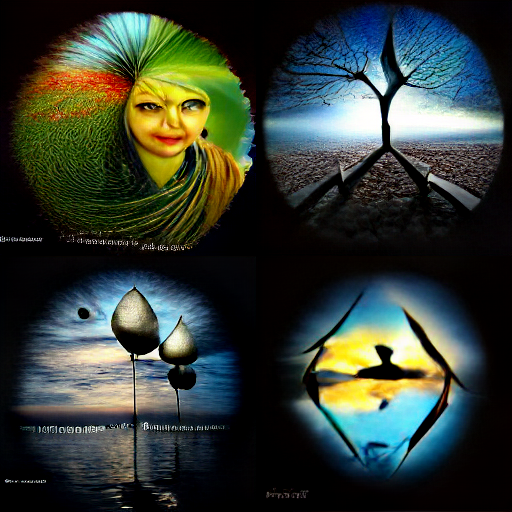

CPU times: user 29.8 s, sys: 505 ms, total: 30.3 s
Wall time: 30.2 s


In [ ]:
%%time

import random


text = f"Create a unique image that depicts {result_1}"
seed=int(time.time()) #use current timestamp as the seed (to get different result for the same prompt each time)
grid_size = 2

display(model.generate_image(text, seed, grid_size))

$\color{yellow}{\text{Generating our second Text-to-Image. The prompt is our phrases variable `result_2`:}}$

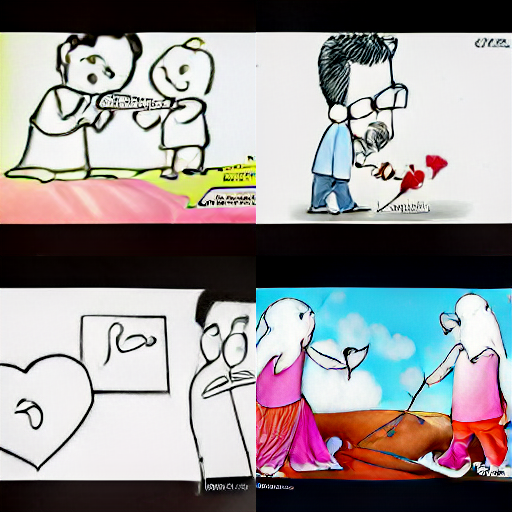

In [ ]:
text = f"Create a unique image that depicts {result_2}"
seed=int(time.time())
grid_size = 2

display(model.generate_image(text, seed, grid_size))

# $\color{red}{\text{Step 5: $\color{green}{\text{Text-to-video with $\color{pink}{\text{Diffusers}}$}}$}}$

This colab showcases the new research text-to-video model by Alibaba and its integration with the <a href="https://huggingface.co/damo-vilab/text-to-video-ms-1.7b">diffusers library <a>.

In [ ]:
#@title Setup pipeline
import torch
from diffusers import DiffusionPipeline, DPMSolverMultistepScheduler
from diffusers.utils import export_to_video
from IPython.display import HTML
from base64 import b64encode

pipe = DiffusionPipeline.from_pretrained("damo-vilab/text-to-video-ms-1.7b", torch_dtype=torch.float16, variant="fp16")
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe.enable_model_cpu_offload()
pipe.enable_vae_slicing()

In [ ]:
#@title Generating our first video. The prompt is our keywords variable `result_1`
prompt = result_1
video_duration_seconds = 3 #@param {type:"integer"}
num_frames = video_duration_seconds * 10
video_frames = pipe(prompt, negative_prompt="high quality", num_inference_steps=25, num_frames=num_frames).frames
video_path = export_to_video(video_frames)

  0%|          | 0/25 [00:00<?, ?it/s]

In [ ]:
#@title Display the video
import imageio
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from skimage.transform import resize
from IPython.display import HTML

def display_video(video):
    fig = plt.figure(figsize=(4.2,4.2))  #Display size specification
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    mov = []
    for i in range(len(video)):  #Append videos one by one to mov
        img = plt.imshow(video[i], animated=True)
        plt.axis('off')
        mov.append([img])

    #Animation creation
    anime = animation.ArtistAnimation(fig, mov, interval=100, repeat_delay=1000)

    plt.close()
    return anime
video = imageio.mimread(video_path)  #Loading video
HTML(display_video(video).to_html5_video())  #Inline video display in HTML5

In [ ]:
#@title Let me make a function for this part
import imageio
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from skimage.transform import resize
from IPython.display import HTML

def display_generated_video(text, video_duration_seconds):
    prompt = text
    num_frames = video_duration_seconds * 10
    video_frames = pipe(prompt, negative_prompt="low quality", num_inference_steps=25, num_frames=num_frames).frames
    video_path = export_to_video(video_frames)

    def display_video(video):
        fig = plt.figure(figsize=(4.2,4.2))  #Display size specification
        fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
        mov = []
        for i in range(len(video)):  #Append videos one by one to mov
            img = plt.imshow(video[i], animated=True)
            plt.axis('off')
            mov.append([img])

        #Animation creation
        anime = animation.ArtistAnimation(fig, mov, interval=100, repeat_delay=1000)

        plt.close()
        return anime

    video = imageio.mimread(video_path)  #Loading video
    return HTML(display_video(video).to_html5_video())  #Inline video display in HTML5


In [ ]:
#@title Generating our second video. The prompt is our phrase variable `result_2`
display_generated_video(result_2,3)

  0%|          | 0/25 [00:00<?, ?it/s]

# $\color{red}{\text{Step 6: $\color{green}{\text{Voice Cloning}}$}}$

The objective of this step is to generate text-to-speech using your own voice. To accomplish this, you need to prepare a dataset consisting of your voice recordings. In my case, `folder_path` represents the path to the dataset directory that contains `.wav` files.

$\color{red}{\text{If you don't have a dataset of your recorded voice in your drive, don't run the following cell!}}$

In [ ]:
import os

# This is the text that will be spoken.
#text = "" This variable was previously defined in the cell above
# Pick a "preset mode" to determine quality. Options: {"ultra_fast", "fast" (default), "standard", "high_quality"}. See docs in api.py
preset = "high_quality"

# specify the folder path that contains .wav files
folder_path = "/content/drive/MyDrive/audios"

# create a custom voice folder
CUSTOM_VOICE_NAME = "custom"
custom_voice_folder = f"tortoise/voices/{CUSTOM_VOICE_NAME}"
os.makedirs(custom_voice_folder, exist_ok=True)

# loop through all the .wav files in the specified folder and upload them to the custom voice folder
for i, filename in enumerate(os.listdir(folder_path)):
    if filename.endswith(".wav"):
        with open(os.path.join(folder_path, filename), "rb") as f:
            file_data = f.read()
            with open(os.path.join(custom_voice_folder, f"{i}.wav"), "wb") as out_file:
                out_file.write(file_data)

$\color{red}{\text{If you don't have a dataset of your recorded voice in your drive, don't run the top cell. Upload your recorded files directly here (Run the following cell instead):}}$

In [ ]:
#If you don't have a dataset of your voice in your drive, run this cell
# This is the text that will be spoken.


# Pick a "preset mode" to determine quality. Options: {"ultra_fast", "fast" (default), "standard", "high_quality"}. See docs in api.py
preset = "high_quality"

# upload at least 2 audio clips. They must be a WAV file, 6-10 seconds long.
CUSTOM_VOICE_NAME = "custom"

custom_voice_folder = f"tortoise/voices/{CUSTOM_VOICE_NAME}"
os.makedirs(custom_voice_folder)
for i, file_data in enumerate(files.upload().values()):
  with open(os.path.join(custom_voice_folder, f'{i}.wav'), 'wb') as f:
    f.write(file_data)

$\color{yellow}{\text{Finally run the following cell to generate the speech:}}$

In [ ]:
# Generate speech
text = summary #lets only generate speech for our summarized text, because the "generated_text + summary = text" is too much but in first step you can decrease 'max_length' for example decrease it to 50-70 in this case you can generate speech for both generated_text and summary at the same time!
voice_samples, conditioning_latents = load_voice(CUSTOM_VOICE_NAME)
gen = tts.tts_with_preset(text, voice_samples=voice_samples, conditioning_latents=conditioning_latents,
                          preset=preset)
torchaudio.save(f'generated-{CUSTOM_VOICE_NAME}.wav', gen.squeeze(0).cpu(), 24000)
IPython.display.Audio(f'generated-{CUSTOM_VOICE_NAME}.wav')

Generating autoregressive samples..


100%|██████████| 16/16 [05:16<00:00, 19.81s/it]


Computing best candidates using CLVP and CVVP


  0%|          | 0/16 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:31: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
 12%|█▎        | 2/16 [00:08<00:58,  4.18s/it]

No stop tokens found in one of the generated voice clips. This typically means the spoken audio is too long. In some cases, the output will still be good, though. Listen to it and if it is missing words, try breaking up your input text.


 25%|██▌       | 4/16 [00:16<00:50,  4.19s/it]

No stop tokens found in one of the generated voice clips. This typically means the spoken audio is too long. In some cases, the output will still be good, though. Listen to it and if it is missing words, try breaking up your input text.


 44%|████▍     | 7/16 [00:29<00:37,  4.21s/it]

No stop tokens found in one of the generated voice clips. This typically means the spoken audio is too long. In some cases, the output will still be good, though. Listen to it and if it is missing words, try breaking up your input text.


100%|██████████| 16/16 [01:07<00:00,  4.22s/it]


Transforming autoregressive outputs into audio..


100%|██████████| 400/400 [06:04<00:00,  1.10it/s]


$\color{yellow}{\text{Increasing the volume:}}$

In [ ]:
#I think Increasing the volume can be a good idea here (It depends on you!)
#Setting the input file location
import os
input_file = '/content/tortoise-tts/generated-custom.wav'

#Loading the file using PyDub
audio = AudioSegment.from_file(input_file, format="wav")

#Setting the value for boosting the volume
boost_volume_dB = 10

#Calculating the number of bytes for sampling at 44,100 Hz frequency
sample_rate, samples = wavfile.read(input_file)
num_bytes = samples.dtype.itemsize
num_samples = len(samples)
num_channels = audio.channels

#Increasing the volume using scipy
samples *= 2 ** (boost_volume_dB / 6)
output_file = "out.wav"
output_path = os.path.abspath(output_file)
wavfile.write(output_file, sample_rate, samples.astype(samples.dtype))

In [ ]:
IPython.display.Audio(output_file)

In [ ]:
print(output_path)

/content/out.wav


$\color{yellow}{\text{Run this cell to upload the generated voice to the directory where we cloned from GitHub and to delete the sample `.wav` from it (I mean MakeItTalk folder)}}$

In [ ]:
#Run this cell to upload the generated voice to the directory which we cloned from GitHub and delete the sample .wav from it (I mean MakeItTalk folder)
import os
import shutil

# Path to the file you want to delete
file_to_delete = '/content/tortoise-tts/MakeItTalk/examples/M6_04_16k.wav' #paste the path of MakeItTalk/examples/M6_04_16k.wav here

# Path to the file you want to move
file_to_move = output_path

# Path to the directory where you want to move the file
destination_directory = '/content/tortoise-tts/MakeItTalk/examples'

# Delete the file
if os.path.exists(file_to_delete):
    os.remove(file_to_delete)
    print(f"Deleted file: {file_to_delete}")
else:
    print(f"File not found: {file_to_delete}")

# Move the file
if os.path.exists(file_to_move):
    shutil.move(file_to_move, destination_directory)
    print(f"Moved file: {file_to_move} to {destination_directory}")
else:
    print(f"File not found: {file_to_move}")

Deleted file: /content/tortoise-tts/MakeItTalk/examples/M6_04_16k.wav
Moved file: /content/out.wav to /content/tortoise-tts/MakeItTalk/examples


# $\color{red}{\text{Step 7: $\color{green}{\text{MakeItTalk: Speaker-Aware Talking-Head Animation}}$}}$

In the preceding step, I created a replicated version of my voice by recording samples of my own voice. In this step the program generates expressive talking-head video from a single facial image (Image of your face) with audio (the cloned voice) as the only input.

At this stage, your uploaded photo will synchronize with the audio we generated in the previous step of our project.
By the way, this particular aspect of the project can be found <a href="https://github.com/yzhou359/MakeItTalk"> here</a>.

$\color{yellow}{\text{Uploading an Image:}}$

$\color{red}{\text{Please note that the size of image should be $\color{orange}{256 \times 256}$ with `.jpg` format.}}$

In [ ]:
#First of all upload a picture of your face. Please note that the size of image should be '256x256' with '.jpg' format.
from google.colab import files

# Path to the directory where you want to save the uploaded photo
destination_directory = '/content/MakeItTalk/examples/'

# Browse and upload a photo
uploaded = files.upload()

# Save the uploaded photo to the destination directory
for filename, data in uploaded.items():
    file_path = destination_directory + filename
    with open(file_path, 'wb') as f:
        f.write(data)
    print(f"Saved file: {filename} to {file_path}")
    a= filename

Saving cc.jpg to cc (1).jpg
Saved file: cc.jpg to /content/MakeItTalk/examples/cc.jpg


In [ ]:
# Find the index of the dot (.)
dot_index = a.rfind(".")

# Remove the extension
a = a[:dot_index]
a

'cc'

Choose the image name to animate: (saved in folder 'examples/')


Dropdown(index=7, options=('angelina', 'anne', 'anne2', 'audrey', 'aya', 'captain', 'captain2', 'cc', 'cesi', …

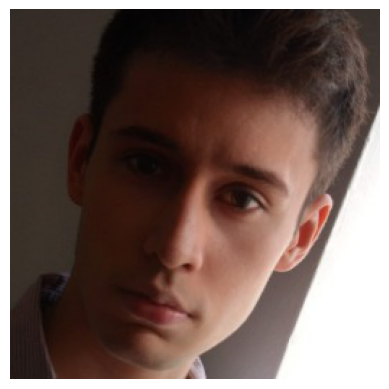

In [ ]:
import ipywidgets as widgets
import glob
import matplotlib.pyplot as plt
print("Choose the image name to animate: (saved in folder 'examples/')")
img_list = glob.glob1('/content/MakeItTalk/examples', '*.jpg')
img_list.sort()
img_list = [item.split('.')[0] for item in img_list]
default_head_name = widgets.Dropdown(options=img_list, value=a)
def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        plt.imshow(plt.imread('examples/{}.jpg'.format(default_head_name.value)))
        plt.axis('off')
        plt.show()
default_head_name.observe(on_change)
display(default_head_name)
plt.imshow(plt.imread('/content/MakeItTalk/examples/{}.jpg'.format(default_head_name.value)))
plt.axis('off')
plt.show()

In [ ]:
#@markdown # Animation Controllers
#@markdown Amplify the lip motion in horizontal direction
AMP_LIP_SHAPE_X = 2 #@param {type:"slider", min:0.5, max:5.0, step:0.1}

#@markdown Amplify the lip motion in vertical direction
AMP_LIP_SHAPE_Y = 2 #@param {type:"slider", min:0.5, max:5.0, step:0.1}

#@markdown Amplify the head pose motion (usually smaller than 1.0, put it to 0. for a static head pose)
AMP_HEAD_POSE_MOTION = 0.35 #@param {type:"slider", min:0.0, max:1.0, step:0.05}

#@markdown Add naive eye blink
ADD_NAIVE_EYE = True  #@param ["False", "True"] {type:"raw"}

#@markdown If your image has an opened mouth, put this as True, else False
CLOSE_INPUT_FACE_MOUTH = False  #@param ["False", "True"] {type:"raw"}


#@markdown # Landmark Adjustment

#@markdown Adjust upper lip thickness (postive value means thicker)
UPPER_LIP_ADJUST = -1 #@param {type:"slider", min:-3.0, max:3.0, step:1.0}

#@markdown Adjust lower lip thickness (postive value means thicker)
LOWER_LIP_ADJUST = -1 #@param {type:"slider", min:-3.0, max:3.0, step:1.0}

#@markdown Adjust static lip width (in multipication)
LIP_WIDTH_ADJUST = 1 #@param {type:"slider", min:0.8, max:1.2, step:0.01}

In [ ]:
import sys
sys.path.append("thirdparty/AdaptiveWingLoss")
import os, glob
import numpy as np
import cv2
import argparse
from src.approaches.train_image_translation import Image_translation_block
import torch
import pickle
import face_alignment
from src.autovc.AutoVC_mel_Convertor_retrain_version import AutoVC_mel_Convertor
import shutil
import time
import util.utils as util
from scipy.signal import savgol_filter
from src.approaches.train_audio2landmark import Audio2landmark_model

sys.stdout = open(os.devnull, 'a')

parser = argparse.ArgumentParser()
parser.add_argument('--jpg', type=str, default='{}.jpg'.format(default_head_name.value))
parser.add_argument('--close_input_face_mouth', default=CLOSE_INPUT_FACE_MOUTH, action='store_true')
parser.add_argument('--load_AUTOVC_name', type=str, default='examples/ckpt/ckpt_autovc.pth')
parser.add_argument('--load_a2l_G_name', type=str, default='examples/ckpt/ckpt_speaker_branch.pth')
parser.add_argument('--load_a2l_C_name', type=str, default='examples/ckpt/ckpt_content_branch.pth') #ckpt_audio2landmark_c.pth')
parser.add_argument('--load_G_name', type=str, default='examples/ckpt/ckpt_116_i2i_comb.pth') #ckpt_image2image.pth') #ckpt_i2i_finetune_150.pth') #c
parser.add_argument('--amp_lip_x', type=float, default=AMP_LIP_SHAPE_X)
parser.add_argument('--amp_lip_y', type=float, default=AMP_LIP_SHAPE_Y)
parser.add_argument('--amp_pos', type=float, default=AMP_HEAD_POSE_MOTION)
parser.add_argument('--reuse_train_emb_list', type=str, nargs='+', default=[]) #  ['iWeklsXc0H8']) #['45hn7-LXDX8']) #['E_kmpT-EfOg']) #'iWeklsXc0H8', '29k8RtSUjE0', '45hn7-LXDX8',
parser.add_argument('--add_audio_in', default=False, action='store_true')
parser.add_argument('--comb_fan_awing', default=False, action='store_true')
parser.add_argument('--output_folder', type=str, default='examples')
parser.add_argument('--test_end2end', default=True, action='store_true')
parser.add_argument('--dump_dir', type=str, default='', help='')
parser.add_argument('--pos_dim', default=7, type=int)
parser.add_argument('--use_prior_net', default=True, action='store_true')
parser.add_argument('--transformer_d_model', default=32, type=int)
parser.add_argument('--transformer_N', default=2, type=int)
parser.add_argument('--transformer_heads', default=2, type=int)
parser.add_argument('--spk_emb_enc_size', default=16, type=int)
parser.add_argument('--init_content_encoder', type=str, default='')
parser.add_argument('--lr', type=float, default=1e-3, help='learning rate')
parser.add_argument('--reg_lr', type=float, default=1e-6, help='weight decay')
parser.add_argument('--write', default=False, action='store_true')
parser.add_argument('--segment_batch_size', type=int, default=1, help='batch size')
parser.add_argument('--emb_coef', default=3.0, type=float)
parser.add_argument('--lambda_laplacian_smooth_loss', default=1.0, type=float)
parser.add_argument('--use_11spk_only', default=False, action='store_true')
parser.add_argument('-f')
opt_parser = parser.parse_args()

img = cv2.imread('examples/' + opt_parser.jpg)
predictor = face_alignment.FaceAlignment(face_alignment.LandmarksType.THREE_D, device='cpu', flip_input=True)
shapes = predictor.get_landmarks(img)
if (not shapes or len(shapes) != 1):
    print('Cannot detect face landmarks. Exit.')
    exit(-1)
shape_3d = shapes[0]
if(opt_parser.close_input_face_mouth):
    util.close_input_face_mouth(shape_3d)
shape_3d[48:, 0] = (shape_3d[48:, 0] - np.mean(shape_3d[48:, 0])) * LIP_WIDTH_ADJUST + np.mean(shape_3d[48:, 0]) # wider lips
shape_3d[49:54, 1] -= UPPER_LIP_ADJUST           # thinner upper lip
shape_3d[55:60, 1] += LOWER_LIP_ADJUST           # thinner lower lip
shape_3d[[37,38,43,44], 1] -=2.    # larger eyes
shape_3d[[40,41,46,47], 1] +=2.    # larger eyes
shape_3d, scale, shift = util.norm_input_face(shape_3d)

print("Loaded Image...", file=sys.stderr)

au_data = []
au_emb = []
ains = glob.glob1('examples', '*.wav')
ains = [item for item in ains if item != 'tmp.wav']

ains.sort()
for ain in ains:
    os.system('ffmpeg -y -loglevel error -i examples/{} -ar 16000 examples/tmp.wav'.format(ain))
    shutil.copyfile('examples/tmp.wav', 'examples/{}'.format(ain))

    # au embedding
    from thirdparty.resemblyer_util.speaker_emb import get_spk_emb
    me, ae = get_spk_emb('examples/{}'.format(ain))
    au_emb.append(me.reshape(-1))

    print('Processing audio file', ain)
    c = AutoVC_mel_Convertor('examples')

    au_data_i = c.convert_single_wav_to_autovc_input(audio_filename=os.path.join('examples', ain),
           autovc_model_path=opt_parser.load_AUTOVC_name)
    au_data += au_data_i
if(os.path.isfile('examples/tmp.wav')):
    os.remove('examples/tmp.wav')

print("Loaded audio...", file=sys.stderr)

# landmark fake placeholder
fl_data = []
rot_tran, rot_quat, anchor_t_shape = [], [], []
for au, info in au_data:
    au_length = au.shape[0]
    fl = np.zeros(shape=(au_length, 68 * 3))
    fl_data.append((fl, info))
    rot_tran.append(np.zeros(shape=(au_length, 3, 4)))
    rot_quat.append(np.zeros(shape=(au_length, 4)))
    anchor_t_shape.append(np.zeros(shape=(au_length, 68 * 3)))

if(os.path.exists(os.path.join('examples', 'dump', 'random_val_fl.pickle'))):
    os.remove(os.path.join('examples', 'dump', 'random_val_fl.pickle'))
if(os.path.exists(os.path.join('examples', 'dump', 'random_val_fl_interp.pickle'))):
    os.remove(os.path.join('examples', 'dump', 'random_val_fl_interp.pickle'))
if(os.path.exists(os.path.join('examples', 'dump', 'random_val_au.pickle'))):
    os.remove(os.path.join('examples', 'dump', 'random_val_au.pickle'))
if (os.path.exists(os.path.join('examples', 'dump', 'random_val_gaze.pickle'))):
    os.remove(os.path.join('examples', 'dump', 'random_val_gaze.pickle'))

with open(os.path.join('examples', 'dump', 'random_val_fl.pickle'), 'wb') as fp:
    pickle.dump(fl_data, fp)
with open(os.path.join('examples', 'dump', 'random_val_au.pickle'), 'wb') as fp:
    pickle.dump(au_data, fp)
with open(os.path.join('examples', 'dump', 'random_val_gaze.pickle'), 'wb') as fp:
    gaze = {'rot_trans':rot_tran, 'rot_quat':rot_quat, 'anchor_t_shape':anchor_t_shape}
    pickle.dump(gaze, fp)

model = Audio2landmark_model(opt_parser, jpg_shape=shape_3d)
if(len(opt_parser.reuse_train_emb_list) == 0):
    model.test(au_emb=au_emb)
else:
    model.test(au_emb=None)

print("Audio->Landmark...", file=sys.stderr)

fls = glob.glob1('examples', 'pred_fls_*.txt')
fls.sort()

for i in range(0,len(fls)):
    fl = np.loadtxt(os.path.join('examples', fls[i])).reshape((-1, 68,3))
    fl[:, :, 0:2] = -fl[:, :, 0:2]
    fl[:, :, 0:2] = fl[:, :, 0:2] / scale - shift

    if (ADD_NAIVE_EYE):
        fl = util.add_naive_eye(fl)

    # additional smooth
    fl = fl.reshape((-1, 204))
    fl[:, :48 * 3] = savgol_filter(fl[:, :48 * 3], 15, 3, axis=0)
    fl[:, 48*3:] = savgol_filter(fl[:, 48*3:], 5, 3, axis=0)
    fl = fl.reshape((-1, 68, 3))

    ''' STEP 6: Imag2image translation '''
    model = Image_translation_block(opt_parser, single_test=True)
    with torch.no_grad():
        model.single_test(jpg=img, fls=fl, filename=fls[i], prefix=opt_parser.jpg.split('.')[0])
        print('finish image2image gen')
    os.remove(os.path.join('examples', fls[i]))

    print("{} / {}: Landmark->Face...".format(i+1, len(fls)), file=sys.stderr)
print("Done!", file=sys.stderr)

Downloading: "https://www.adrianbulat.com/downloads/python-fan/s3fd-619a316812.pth" to /root/.cache/torch/hub/checkpoints/s3fd-619a316812.pth
100%|██████████| 85.7M/85.7M [00:13<00:00, 6.49MB/s]
Downloading: "https://www.adrianbulat.com/downloads/python-fan/3DFAN4-4a694010b9.zip" to /root/.cache/torch/hub/checkpoints/3DFAN4-4a694010b9.zip
100%|██████████| 91.9M/91.9M [00:08<00:00, 10.9MB/s]
Downloading: "https://www.adrianbulat.com/downloads/python-fan/depth-6c4283c0e0.zip" to /root/.cache/torch/hub/checkpoints/depth-6c4283c0e0.zip
100%|██████████| 224M/224M [00:03<00:00, 75.5MB/s]
Loaded Image...
Loaded audio...
/content/MakeItTalk/src/approaches/train_audio2landmark.py:98: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  z = torch.tensor(torch.zeros(aus.shape[0], 128), requires_grad=False, dtype=torch.float).to(device)
Audio->Landmark...

$\color{yellow}{\text{Displaying the final video:}}$

In [ ]:
from IPython.display import HTML
from base64 import b64encode

for ain in ains:
  OUTPUT_MP4_NAME = '{}_pred_fls_{}_audio_embed.mp4'.format(
    opt_parser.jpg.split('.')[0],
    ain.split('.')[0]
    )
  mp4 = open('examples/{}'.format(OUTPUT_MP4_NAME),'rb').read()
  data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

  print('Display animation: examples/{}'.format(OUTPUT_MP4_NAME), file=sys.stderr)
  display(HTML("""
  <video width=600 controls>
        <source src="%s" type="video/mp4">
  </video>
  """ % data_url))

Display animation: examples/cc_pred_fls_out1_audio_embed.mp4


In [ ]:
OUTPUT_MP4_NAME

'cc_pred_fls_out1_audio_embed.mp4'

$\color{yellow}{\text{Dividing the above video into three squares (from the width) and Cropping the middle square from the video, which is known as the result of our work:}}$

In [ ]:
!pip install moviepy

In [ ]:
import moviepy.editor as mp
a=''
def divide_video(video_path):
    global a
    # Load the video
    video = mp.VideoFileClip(video_path)

    # Get video information
    video_info = {
        "duration": video.duration,
        "width": video.w,
        "height": video.h
    }
    print("Video information:")
    print(video_info)

    # Calculate the size of each square
    square_width = video.w // 3
    square_height = video.h

    # Calculate the coordinates of the middle square
    middle_square = (square_width, 0, square_width * 2, square_height)

    # Crop the middle square from the video
    cropped_video = video.crop(*middle_square)

    # Save the cropped video
    output_path = "/content/fine.mp4"
    a = output_path
    cropped_video.write_videofile(output_path)

    print("The video has been divided into three squares.")
    print("The middle square has been saved as 'fine.mp4' in the '/content/' directory.")


# Specify the path to your video file
video_path = '/content/MakeItTalk/examples/'+OUTPUT_MP4_NAME

# Call the function to divide the video
divide_video(video_path)

t:  97%|█████████▋| 1086/1116 [00:03<00:00, 266.74it/s, now=None]WARNING:py.warnings:/usr/local/lib/python3.10/dist-packages/moviepy/video/io/ffmpeg_reader.py:123: UserWarning: Warning: in file /content/MakeItTalk/examples/cc_pred_fls_out1_audio_embed.mp4, 589824 bytes wanted but 0 bytes read,at frame 1094/1116, at time 17.50/17.85 sec. Using the last valid frame instead.
  warnings.warn("Warning: in file %s, "%(self.filename)+

  warnings.warn("Warning: in file %s, "%(self.filename)+

  warnings.warn("Warning: in file %s, "%(self.filename)+

  warnings.warn("Warning: in file %s, "%(self.filename)+

  warnings.warn("Warning: in file %s, "%(self.filename)+

  warnings.warn("Warning: in file %s, "%(self.filename)+

  warnings.warn("Warning: in file %s, "%(self.filename)+

  warnings.warn("Warning: in file %s, "%(self.filename)+

  warnings.warn("Warning: in file %s, "%(self.filename)+

  warnings.warn("Warning: in file %s, "%(self.filename)+

  warnings.warn("Warning: in file %s, "%(self

In [ ]:
a

'/content/fine.mp4'

$\color{yellow}{\text{Displaying the final video:}}$

In [ ]:
mp4 = open(a,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
print('Display animation: examples/{}'.format(a),file=sys.stderr)
display(HTML("""
<video width=200 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url))

Display animation: examples//content/fine.mp4
